In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
#checking for sum of null values in data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

/tmp/ipykernel_24/4141105712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

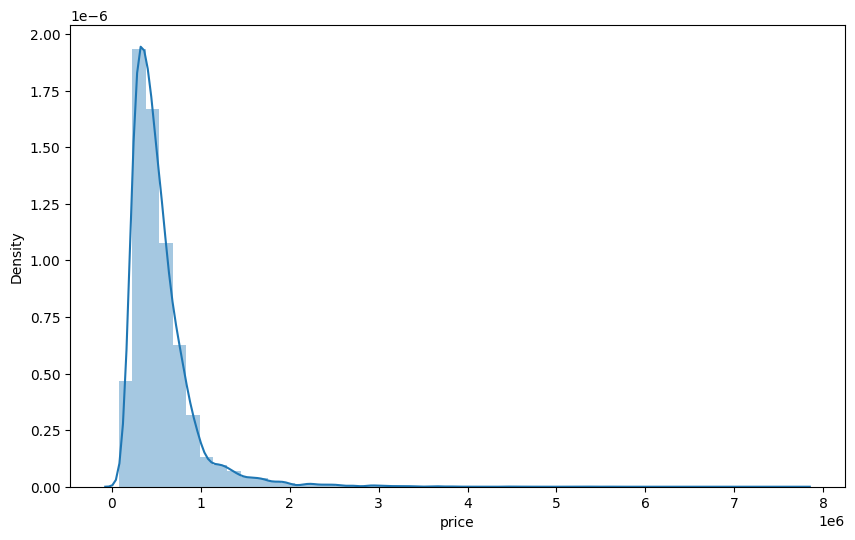

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

<Axes: xlabel='price', ylabel='sqft_living'>

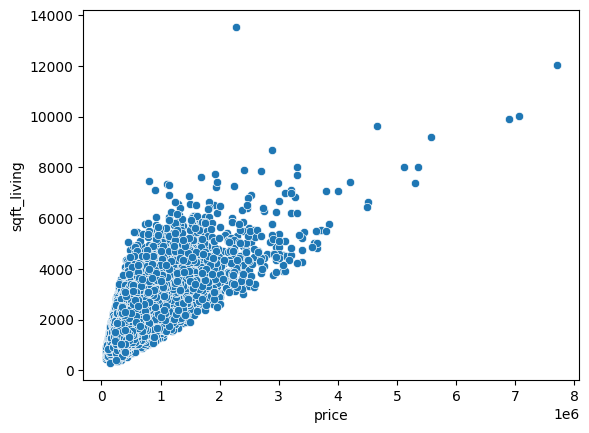

In [9]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

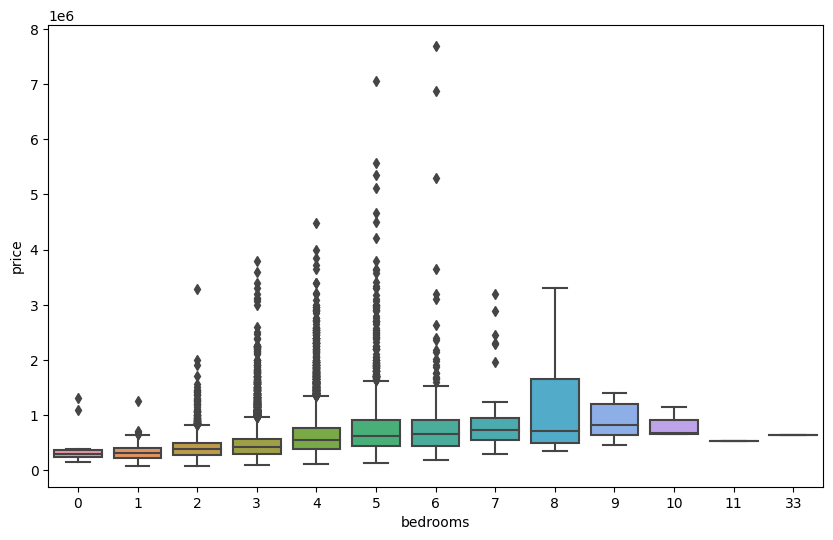

In [10]:
#boxplot for distribution of prices with bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price', data=df)

<Axes: xlabel='price', ylabel='lat'>

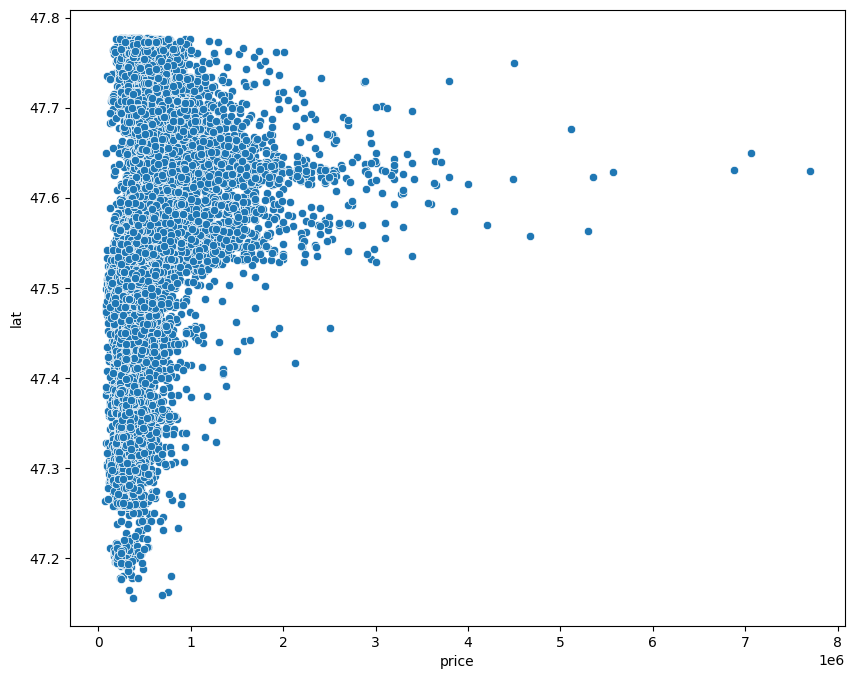

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

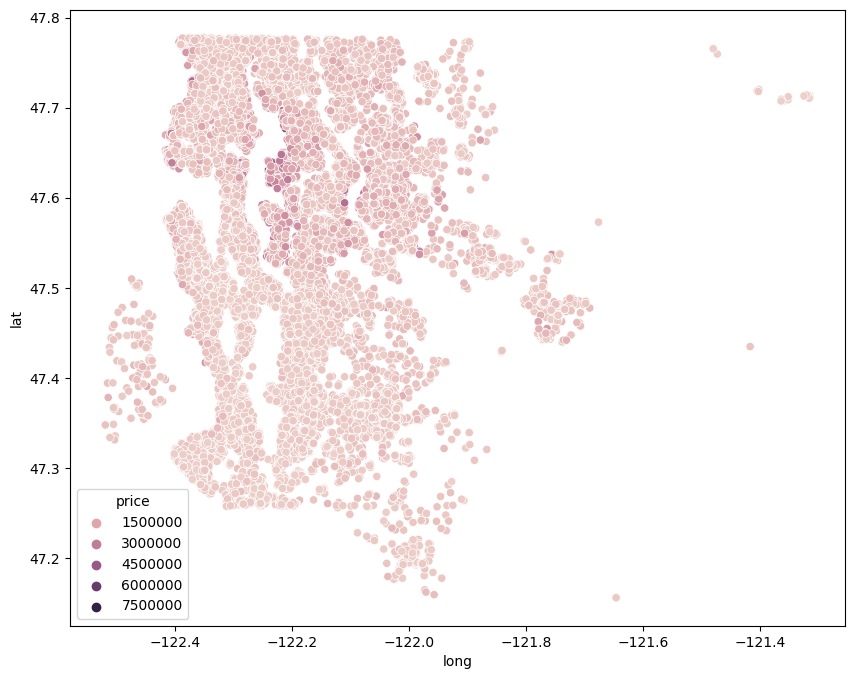

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [13]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [14]:
non_top_1_percent=df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

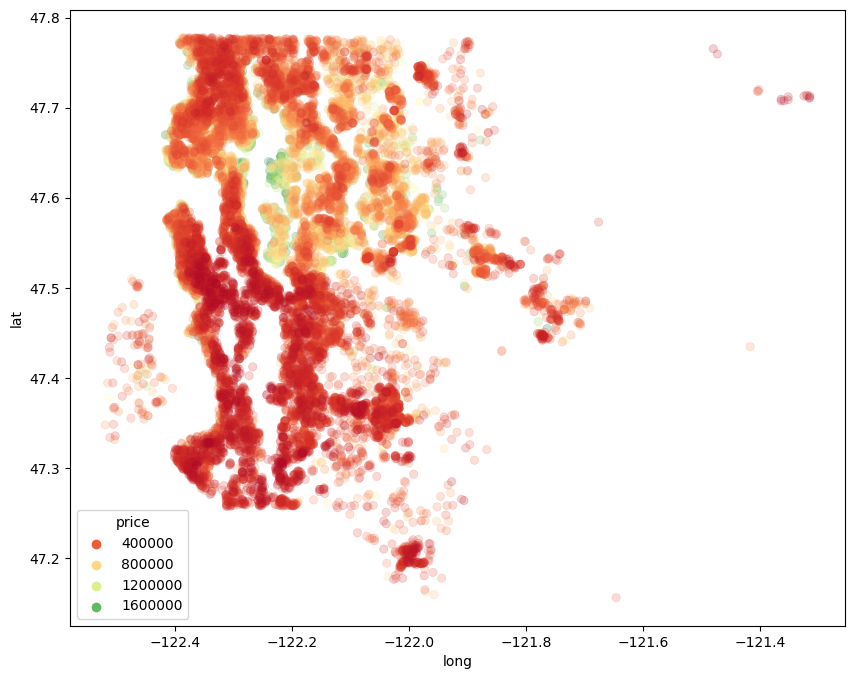

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_percent,edgecolor=None,alpha=0.2, palette='RdYlGn',hue='price')

<Axes: xlabel='waterfront', ylabel='price'>

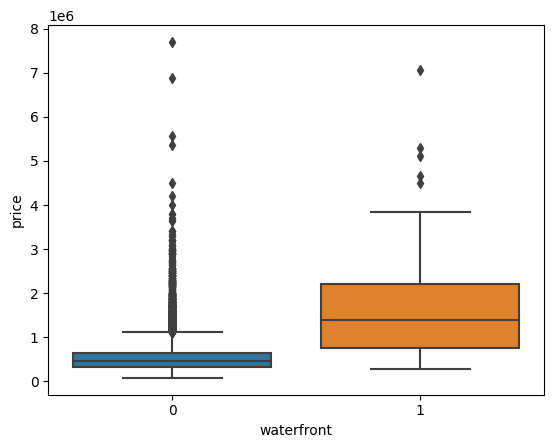

In [16]:
sns.boxplot(x='waterfront',y='price',data=df)

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df=df.drop('id',axis=1)

In [19]:
df['date']=pd.to_datetime(df['date'])

In [20]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [21]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

In [22]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


<Axes: xlabel='month', ylabel='price'>

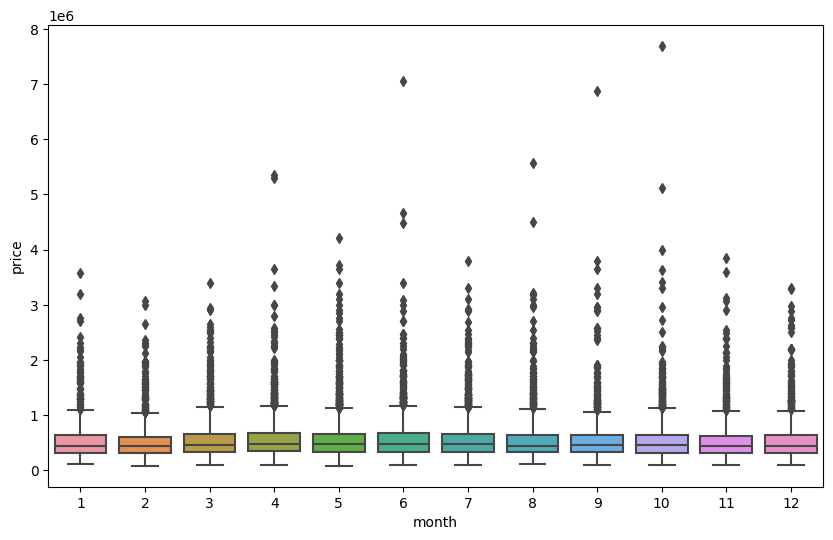

In [23]:
plt.figure(figsize=(10,6))

sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='year'>

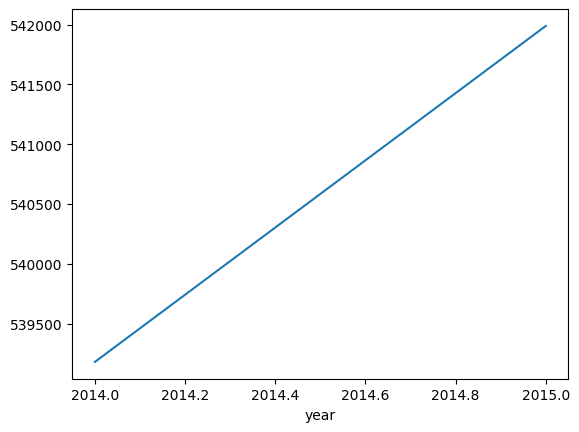

In [24]:
df.groupby('year').mean()['price'].plot()

In [25]:
df=df.drop('date',axis=1)

In [26]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [27]:
#looking into zip code
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    310
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98031    274
98072    273
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, dtype: int64

In [28]:
df=df.drop('zipcode',axis=1)

In [29]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
2007       35
2000       35
2004       26
1990       25
2006       24
1989       22
2002       22
2009       22
1991       20
1994       19
1998       19
1993       19
2001       19
1984       18
2008       18
1983       18
1987       18
2010       18
1992       17
1985       17
1999       17
1986       17
2015       16
1995       16
1988       15
1997       15
1996       15
2011       13
2012       11
1980       11
1982       11
1979       10
1970        9
1977        8
1968        8
1975        6
1978        6
1958        5
1964        5
1973        5
1981        5
1965        5
1969        4
1963        4
1972        4
1960        4
1957        3
1956        3
1976        3
1974        3
1955        3
1953        3
1945        3
1940        2
1946        2
1971        2
1950        2
1962        2
1967        2
1948        1
1954        1
1951        1
1959        1
1934        1
1944        1
Name: c

In [30]:
#converting yr renovated to binary (1 if renovated, 0 not renovated)
df['yr_renovated']= df['yr_renovated'].apply(lambda x: 0 if x==0 else 1)


In [31]:
df['yr_renovated'].value_counts()

yr_renovated
0    20699
1      914
Name: count, dtype: int64

# **Starting The ML process**

In [32]:
X=df.drop('price', axis=1).values
y=df['price'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
#scaling- we will do the scaling post split.In this way we only fit to the training set to prevent data leakage from the test set.

from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test= scaler.transform(X_test)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-05-07 16:38:55.970985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 16:38:55.971081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 16:38:56.091966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [40]:
#selecting the number of neurons- selecting 19 neurons
X_train.shape

(15129, 19)

In [41]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [42]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

Epoch 1/400
101/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 417156923392.0000

I0000 00:00:1715099948.973956      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 417650245632.0000 - val_loss: 432977608704.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 421354307584.0000 - val_loss: 427559747584.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 406637707264.0000 - val_loss: 379984019456.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 327910096896.0000 - val_loss: 232077295616.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184963317760.0000 - val_loss: 112761266176.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100270202880.0000 - val_loss: 104193507328.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98865233920.0000 - val_loss: 102458941440.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89528655872.0000 - val_loss: 100750925824.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97655095296.0000 - val_loss: 98987352064.0000
Epoch 10/400
119/119 ━━━━━━━━━━━━━

# Evaluation of ML model***

In [43]:
losses =pd.DataFrame(model.history.history)

<Axes: >

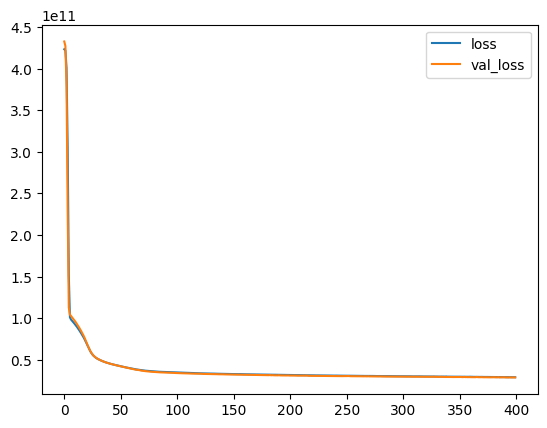

In [44]:
losses.plot()

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [46]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
np.sqrt(mean_squared_error(y_test,predictions))

168757.14412854216

In [48]:
mean_absolute_error(y_test,predictions)

105654.30549236582

In [49]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [50]:
explained_variance_score(y_test,predictions)

0.7973916755657139

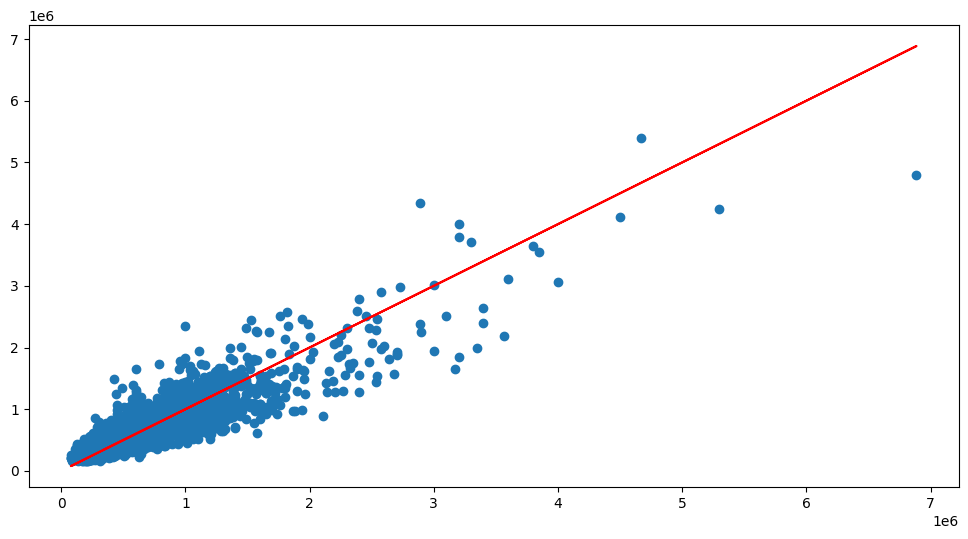

In [51]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [52]:
single_house = df.drop('price', axis=1).iloc[0]

In [53]:
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [54]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


array([[291393.47]], dtype=float32)

In [55]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
